Problem statement: using data set to predict expenses using features like age,bmi,childern,smoker.These predictions will be used by company for charges of insuarnce premium 

import packages 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\DELL\ML_Project\notebook\data\insurance.csv")

EDA 

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [13]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [14]:
df.shape

(1338, 7)

In [16]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [8]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
numeric_features = [col for col in df.columns if df[col].dtype!= 'O']
cat_features = [col for col in df.columns if df[col].dtype == 'O']
print(numeric_features)
print(cat_features)

['age', 'bmi', 'children', 'expenses']
['sex', 'smoker', 'region']


In [22]:
df['sex'].unique()
df['smoker'].unique()
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

DATA VISULIZATION

Univariate analysis

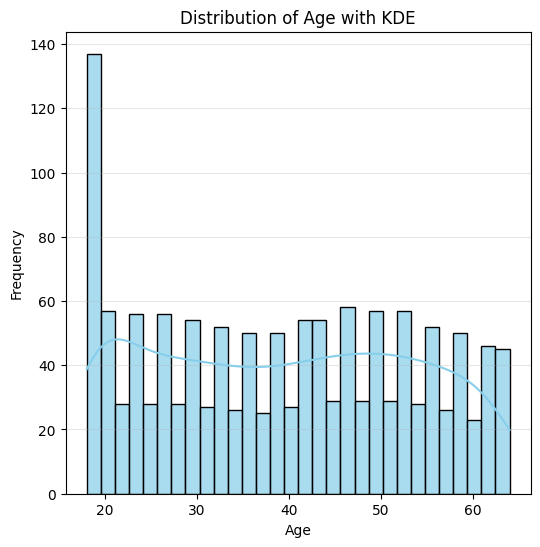

In [27]:
# Plot histogram with KDE using seaborn
plt.figure(figsize=(6, 6))
sns.histplot(data=df, x='age', kde=True, bins=30, alpha=0.7, 
             edgecolor='black', color='skyblue')
plt.title('Distribution of Age with KDE')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()

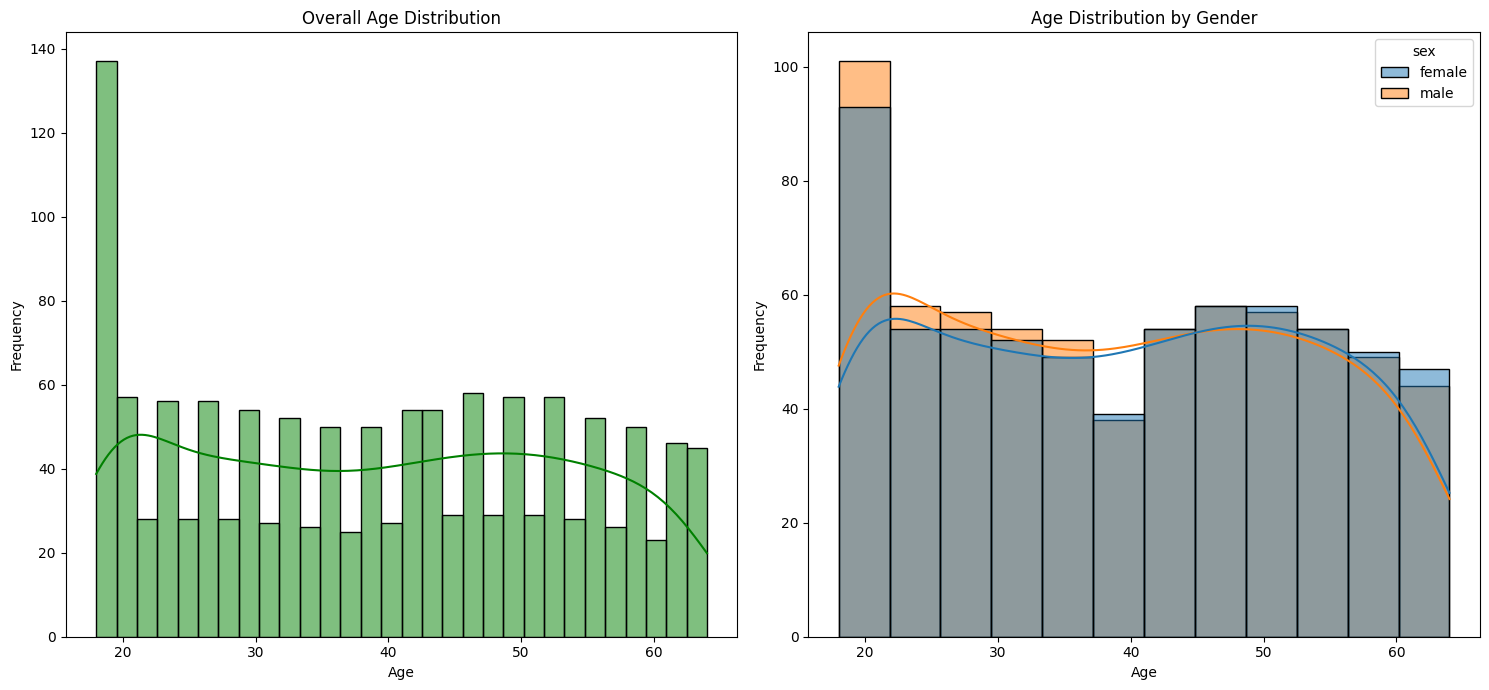

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot - Overall distribution
sns.histplot(data=df, x='age', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Overall Age Distribution')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

# Second subplot - Distribution by gender
sns.histplot(data=df, x='age', kde=True, hue='sex', ax=axs[1])  # Using 'sex' instead of 'gender'
axs[1].set_title('Age Distribution by Gender')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [32]:
# Create age groups with specific ranges
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 18, 25, 35, 45, 55, 65, 100],
                         labels=['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+'])

print("Age group distribution:")
print(df['age_group'].value_counts().sort_index())

Age group distribution:
age_group
0-18      69
19-25    237
26-35    268
36-45    264
46-55    284
56-65    216
65+        0
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_15112\2231620645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='age_group', y='bmi', estimator='mean',


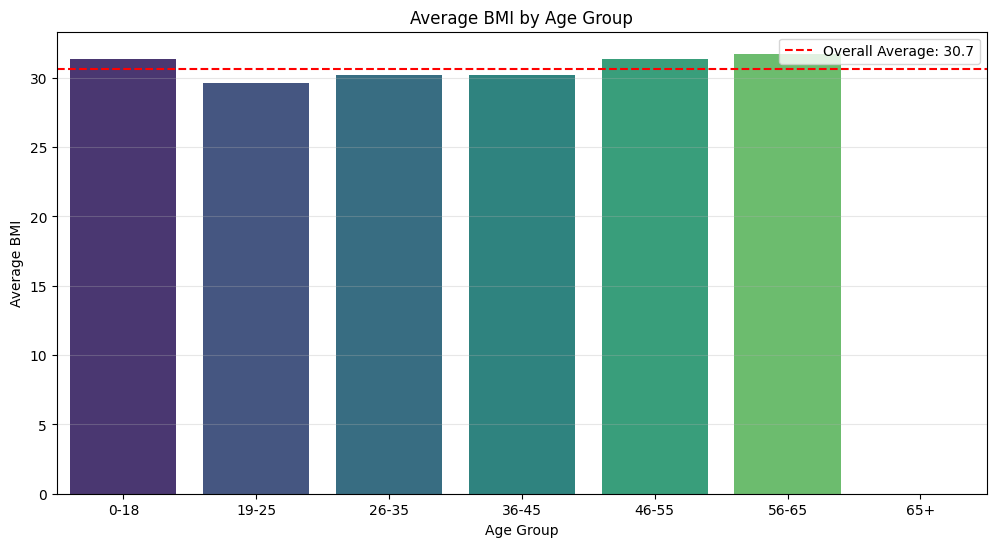

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='age_group', y='bmi', estimator='mean', 
            errorbar=None, palette='viridis')
plt.title('Average BMI by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average BMI')
plt.axhline(y=df['bmi'].mean(), color='red', linestyle='--', 
            label=f'Overall Average: {df["bmi"].mean():.1f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()